<a href="https://colab.research.google.com/github/lygitdata/GarmentIQ/blob/main/python_api_demo/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import `garmentiq`, install dependencies, and download test images

In [1]:
import sys

!git clone https://github.com/lygitdata/GarmentIQ.git
!pip install -r /content/GarmentIQ/src/requirements.txt -q

sys.path.insert(0, './GarmentIQ/src')

Cloning into 'GarmentIQ'...
remote: Enumerating objects: 1699, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 1699 (delta 44), reused 15 (delta 15), pack-reused 1617 (from 2)
Receiving objects: 100% (1699/1699), 262.79 MiB | 23.44 MiB/s, done.
Resolving deltas: 100% (863/863), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [2]:
import garmentiq as giq

In [3]:
!mkdir -p /content/test_images

!wget -q -O /content/test_images/cloth_1.jpg https://garmentiq.ly.gd.edu.kg/asset/img/cloth_1.jpg
!wget -q -O /content/test_images/cloth_2.jpg https://garmentiq.ly.gd.edu.kg/asset/img/cloth_2.jpg
!wget -q -O /content/test_images/cloth_3.jpg https://garmentiq.ly.gd.edu.kg/asset/img/cloth_3.jpg
!wget -q -O /content/test_images/cloth_4.jpg https://garmentiq.ly.gd.edu.kg/asset/img/cloth_4.jpg

# Function `load_model`

Source code: https://github.com/lygitdata/GarmentIQ/blob/main/src/garmentiq/segmentation/load_model.py

In [4]:
BiRefNet = giq.segmentation.load_model(
    pretrained_model='ZhengPeng7/BiRefNet',
    pretrained_model_args={'trust_remote_code': True},
    high_precision=False
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

BiRefNet_config.py:   0%|          | 0.00/298 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ZhengPeng7/BiRefNet:
- BiRefNet_config.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


birefnet.py:   0%|          | 0.00/92.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ZhengPeng7/BiRefNet:
- birefnet.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


model.safetensors:   0%|          | 0.00/444M [00:00<?, ?B/s]

# Function `extract`

Source code: https://github.com/lygitdata/GarmentIQ/blob/main/src/garmentiq/segmentation/extract.py

In [5]:
original_img, mask = giq.segmentation.extract(
    model=BiRefNet,
    image_path='/content/test_images/cloth_1.jpg',
    resize_dim=(1024, 1024),
    normalize_mean=[0.485, 0.456, 0.406],
    normalize_std=[0.229, 0.224, 0.225],
    high_precision=False
)

In [6]:
print(original_img.shape)
print(mask.shape)

(2400, 1800, 3)
(2400, 1800)


# Function `plot`

Source code: https://github.com/lygitdata/GarmentIQ/blob/main/src/garmentiq/segmentation/plot.py

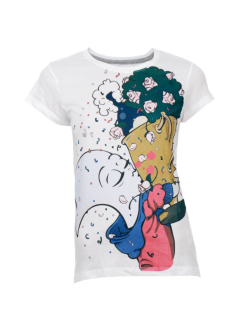

In [8]:
giq.segmentation.plot(image_np=original_img, figsize=(3, 3))

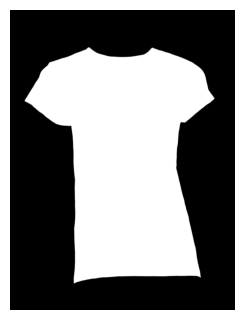

In [9]:
giq.segmentation.plot(image_np=mask, figsize=(3, 3))

# Function `change_background_color`

Source code: https://github.com/lygitdata/GarmentIQ/blob/main/src/garmentiq/segmentation/change_background_color.py

In [10]:
bg_modified_img = giq.segmentation.change_background_color(
    image_np=original_img,
    mask_np=mask,
    background_color=[102, 255, 102]
)

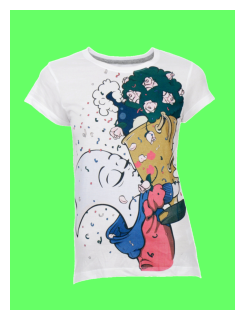

In [11]:
giq.segmentation.plot(image_np=bg_modified_img, figsize=(3, 3))

# Function `process_and_save_images`

Source code: https://github.com/lygitdata/GarmentIQ/blob/main/src/garmentiq/segmentation/process_and_save_images.py

## Mask only

You can also check out the folder `/content/output_mask_only` to see the processed images.

In [12]:
giq.segmentation.process_and_save_images(
    image_dir="/content/test_images",
    output_dir="/content/output_mask_only",
    model=BiRefNet,
    resize_dim=(1024, 1024),
    normalize_mean=[0.485, 0.456, 0.406],
    normalize_std=[0.229, 0.224, 0.225],
    high_precision=False
)

Processing Images: 100%|██████████| 4/4 [00:02<00:00,  1.61image/s]


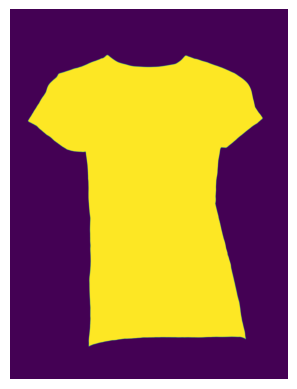

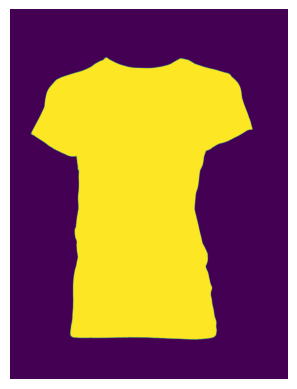

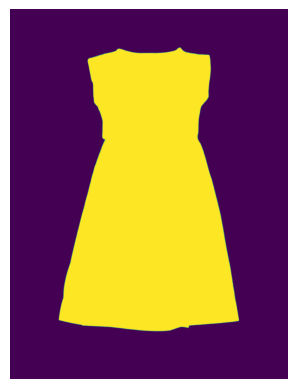

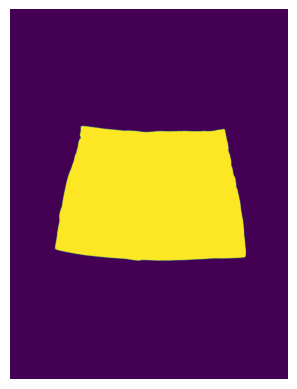

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# See masks
for i in range(1, 5):
  img = mpimg.imread(f"/content/output_mask_only/masks/mask_cloth_{i}.png")
  plt.imshow(img)
  plt.axis('off')
  plt.show()

## Mask and background modification

You can also check out the folder `/content/output_all` to see the processed images.

In [14]:
giq.segmentation.process_and_save_images(
    image_dir="/content/test_images",
    output_dir="/content/output_all",
    model=BiRefNet,
    resize_dim=(1024, 1024),
    normalize_mean=[0.485, 0.456, 0.406],
    normalize_std=[0.229, 0.224, 0.225],
    background_color=[102, 255, 102],
    high_precision=False
)

Processing Images: 100%|██████████| 4/4 [00:04<00:00,  1.10s/image]


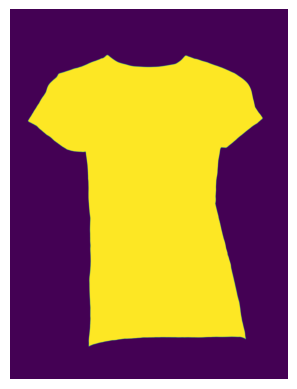

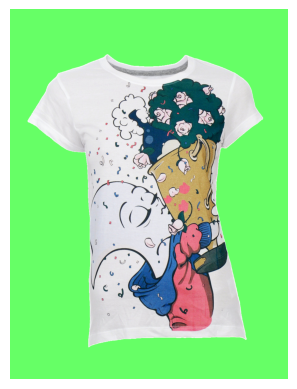

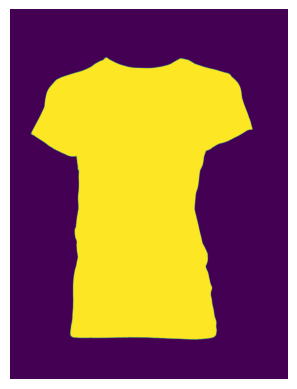

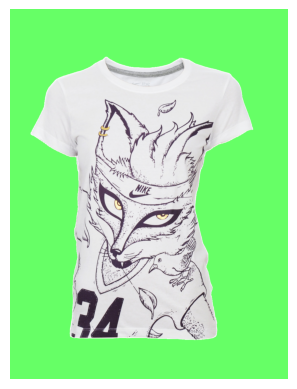

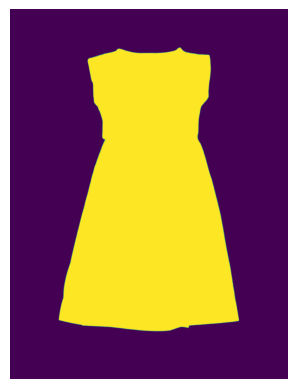

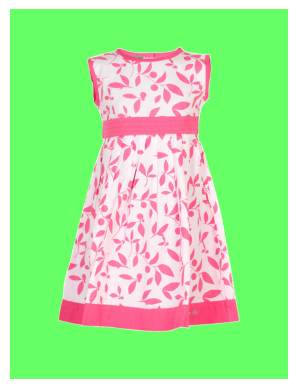

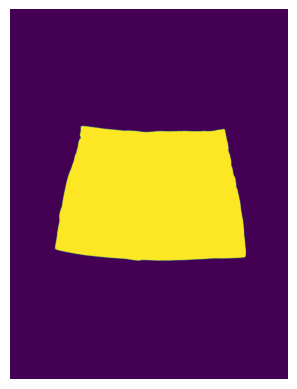

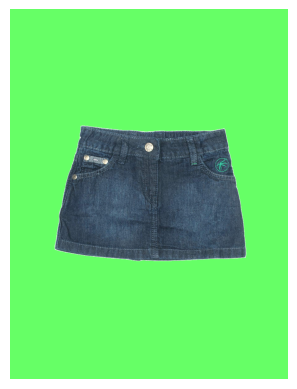

In [15]:
for i in range(1, 5):
  mask = mpimg.imread(f"/content/output_all/masks/mask_cloth_{i}.png")
  plt.imshow(mask)
  plt.axis('off')
  plt.show()

  bg_modified = mpimg.imread(f"/content/output_all/bg_modified/bg_modified_cloth_{i}.png")
  plt.imshow(bg_modified)
  plt.axis('off')
  plt.show()